### Overfitting and Pre-Pruning

In [2]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

# load dataset 'titanic_train.csv' for titanic case, using 'PassengerId' as index column

data = pd.read_csv('titanic_train.csv', index_col='PassengerId')

# Replace missing values in 'Age' with mean (numeric variables) 

data['Age'].fillna(data['Age'].mean(),inplace=True)

# Replace missing values in ‘Embarked’ with the most frequent value (mode) 

data['Embarked'].fillna(data['Embarked'].value_counts().index[0], inplace = True)

# Delete the column 'Cabin', too many missing values

data = data.drop(columns='Cabin')

# Create dummy variables for categorical feature 'Sex' and 'Embarked', using 'Sex' and 'Embarked' as prefix, and drop the first dummy
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'], drop_first=True)

data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [3]:
# show the frequency of values for target variable

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
# get the types of features for test set (pay attension to attributes with missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Ticket      891 non-null    object 
 7   Fare        891 non-null    float64
 8   Sex_male    891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 65.3+ KB


In [5]:
# write the cleaned results to csv file for later use. 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
data.to_csv('titanic_cleaned.csv', index=True)

### We will build classification model based on this cleaned dataset

In [6]:
# define attributes and target variable

features = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
target = ['Survived']

# assign values for independent variables and target variable

X = data [features]
y = data [target]

In [7]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# import evaluation tools
from sklearn.metrics import accuracy_score

In [8]:
# import train_test split
from sklearn.model_selection import train_test_split

# split train data into train and test, 60% in training and 40% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

In [9]:
# define our model decision tree model
model = DecisionTreeClassifier()

# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# test model base on 40% data
pred_val = model.predict(X_test)

In [11]:
# print evaluation result for 40% test data
print("Accuracy from 40% test data:", accuracy_score(y_test, pred_val, normalize=True, sample_weight=None))


Accuracy from 40% test data: 0.7563025210084033


In [12]:
# test evaluation result for 60% train data
pred_val_train = model.predict(X_train)


In [13]:
# print evaluation result for 60% train data
print("Accuracy from 60% train data:",accuracy_score(y_train, pred_val_train, normalize=True, sample_weight=None))

Accuracy from 60% train data: 0.9831460674157303


**Apparently, there is a discrepancy in model performance on training set and test set. Symptoms of overfitting: good accuracy on training data but poor on hold out test data!**

**Next,let's explore the model performance on training and test set by varying the depth of the tree.**
- max_depth indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the training data. 
- Let's fit the decision tree with depths ranging from 1 to 32 and plot the train and test accuracy scores

In [13]:
# create an array that holds the max_depth
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
max_depth = np.linspace(1,32,32, endpoint=True)

In [14]:
max_depth
# ouput with dot = no meaning

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [15]:
# generate two empty lists to store the model performance under different tree max_depths
train_results =[]
test_results = []

# create a loop to try out all the number from 1 to 32 as max_depth in a decision tree
for max_depth_i in max_depth:
    
    # train the model (with the specific tree max_depth)
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    # evalute model performance on training set    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    # append the result to the list train_results
    train_results.append(accuracy)
    
    # evalute model performance on training set        
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    # append the result to the list train_results
    test_results.append(accuracy)

In [16]:
train_results

[0.7921348314606742,
 0.799625468164794,
 0.8370786516853933,
 0.848314606741573,
 0.8576779026217228,
 0.8726591760299626,
 0.8876404494382022,
 0.9063670411985019,
 0.9325842696629213,
 0.949438202247191,
 0.9588014981273408,
 0.9719101123595506,
 0.9794007490636704,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303,
 0.9831460674157303]

In [17]:
test_results

[0.7787114845938375,
 0.7843137254901961,
 0.8123249299719888,
 0.8123249299719888,
 0.7955182072829131,
 0.7899159663865546,
 0.7843137254901961,
 0.7535014005602241,
 0.7507002801120448,
 0.7478991596638656,
 0.7535014005602241,
 0.7619047619047619,
 0.7535014005602241,
 0.7563025210084033,
 0.7535014005602241,
 0.7507002801120448,
 0.7507002801120448,
 0.7563025210084033,
 0.7450980392156863,
 0.7563025210084033,
 0.7563025210084033,
 0.7507002801120448,
 0.7507002801120448,
 0.7535014005602241,
 0.7563025210084033,
 0.7619047619047619,
 0.7535014005602241,
 0.7563025210084033,
 0.7591036414565826,
 0.7535014005602241,
 0.7394957983193278,
 0.7647058823529411]

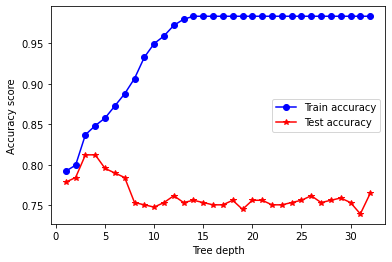

In [18]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

line1, = plt.plot(max_depth, train_results, marker='o', color='b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, marker='*', color='r', label='Test accuracy')
plt.legend()
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

#### Symptoms of overfitting: good accuracy on training data but poor on hold out test data!
**You can also change other hyperparameters in the tree (eg: min_sample_split, min_samples_leaf, max_leaf_nodes, etc.) to understand the overfitting problem**

Train Data Set: as the tree depth increase, the more accurate the result is
Test Data Set: the accuracy level does not necessary associate with the tree depth, its optimal depth is around 3-5